# Crime in Vancouver EDA
### By: William Zhu, Daniel Luo, Alex Trudel, Jiancong Qi


#### Introduction

The data presented in this report details crime in the city of Vancouver. Vancouver is a city located in the province of British Columbia in Canada and became an incorporated city in 1886. In the present day, the greater metro Vancouver region hosts a population of 2.43 million people and has a wide range of demographics throughout the city’s diverse neighborhood. Through exploratory data analysis of the dataset, we aim to present insights into Vancouver crime by looking at:
- Total crime throughout the years
- Trends in specific types of crime 
- Crime trends by neighbourhoods

#### Background information on the city


The Greater Metro Vancouver area is a regional district in the province of British Columbia and is comprised of many municipalities and communities within the Canadian Lower Mainland. The regional district’s most populous city is the city of Vancouver and is the main region of focus within the Crime in Vancouver dataset. The city of Vancouver contains 23 neighborhoods that can be observed in the map below and contain a mix of various socio-economic and ethinic backgrounds. 

<img src="map of vancouver .png" alt="Drawing" style="width: 400px;"/>

The general trends of socio-economic demographics see more wealth being concentrated in neighborhoods in the west of Vancouver and the central business districts of the West End and Downtown. Neighborhoods in the east and south-east of the Vancouver region generally see lower income per household and property values than those in the west side of the city. Vancouver also has several neighborhoods with distinct ethnic mixes. Those of English, Irish and Scottish origins were historically the largest ethnic group in Vancouver, and this is still visible in areas like Kerrisdale and South Granville. Germans are the second-largest European group, followed by the Chinese, who are the largest visible ethnic group.

Vancouver is not recognized as a city with frequent crime but certain notable incidents of crime include the 2011 Vancouver Stanley Cup riots which was a large public disturbance in the Downtown neighborhood following the loss of the city’s hometown hockey team, the Vancouver Canucks, in the NHL playoffs between the Boston Bruins. The incident lead to 887 charges against 301 individuals and included charges such as mischief, theft and violent assault. Incidents like these are present in the proposed dataset and provide meaningful context for potential outliers and strange relationships found during analysis. 

#### Summary of the Dataset and Variables

The data is collected by the Vancouver Police Department and is sourced from their police databases. The dataset contains 530,652 observations of 12 variables. These variables include: 

    TYPE 
    YEAR
    MONTH
    DAY
    HOUR
    MINUTE
    HUNDRED_BLOCK
    NEIGHBOURHOOD
    X
    Y
    Latititude
    Longitude

The variable "TYPE" is a categorical variable that contains the type of crime committed in each observation and has no missing values. The possible values of this variable or the types of crimes recorded in the dataset include:

    Break and Enter Commercial                          
    Break and Enter Residential/Other                     
    Homicide                                            
    Mischief                                              
    Offence Against a Person                              
    Other Theft                                           
    Theft from Vehicle                                    
    Theft of Bicycle                                      
    Theft of Vehicle                                      
    Vehicle Collision or Pedestrian Struck (with Fatality)
    Vehicle Collision or Pedestrian Struck (with Injury)  

The other variables in the dataset can be classified as time variables and geographic variables. 

The variables YEAR, MONTH, DAY, HOUR, and MINUTE describe when the crime ocurred

The variables HUNDRED_BLOCK, NEIGHBOURHOOD, X, Y, Latitude, and Longitutde describe where the crime occured.  

From the time variables, each variable in this group measures the unit of time from minute to year during which the reported activity was committed. In this group, the variables Hour and Minute have a total of 54,362 missing values represented by N/A for all violent crimes in the variable "TYPE" for Homicide and Offense Against a Person. These values were intentionally omitted by the police department in order to protect the privacy of the involved indivduals in the crime. 

Amongst the geographic variables, some of these variables are more specific so we will provide clarification on each variable. 

- The variable "HUNDRED_BLOCK" represents a generalized location of the reported crime as a string formatted with all address numbers past the hundreth visible along with the street name included. 

- The variable "NEIGHBOURHOOD" is a categorical variable with 24 possible values that include each of the 23 neighbourhoods in the city of Vancouver and details in which neighbourhood the reported crime was committed. 

- The variables "X" and "Y" are coordinate values projected in the UTM Zone 10 of where the reported crime was comitted and the variables "Longitude" and "Latitude" are the values of variables "X" and "Y" respectively converted to longitude and latitude. 

For all of the geographic variables, all observations of violent crimes in the variable "TYPE" for Homicide and Offense Against a Person are labelled with a value that represents ommitted information.
- In the variable "HUNDRED_BLOCK", these observations contain a string "OFFSET TO PROTECT PRIVACY". 
- In the variable "NEIGHBOURHOOD", these observations have a value of "", and in variables "X", "Y", "Longitude", "Latitude", these observations have values 0. 

Again, these values were intentionally omitted by the police department in order to protect the privacy of the involved indivduals in the crime but unlike the "MINUTES" and "HOURS" variables, these values represent no information but aren't considered missing.

## Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [2]:
data = pd.read_csv('/Users/danielluo/Downloads/crime-in-vancouver/crime.csv')

- Dropping these columns as we won't be using them in our analysis

In [3]:
data.drop(['MINUTE', 'HUNDRED_BLOCK', 'X','Y'], axis = 1, inplace = True)
data['NEIGHBOURHOOD'].fillna('N/A', inplace=True)

- Creating a DATE variable and using it as the index

In [4]:
data['DATE'] = pd.to_datetime({'year': data['YEAR'], 'month': data['MONTH'], 'day': data['DAY']})
data = data.sort_values(['DATE'])
data['Day of Week'] = data['DATE'].dt.dayofweek
data.index = pd.DatetimeIndex(data['DATE'])
data.head(10)

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD,Latitude,Longitude,DATE,Day of Week
DATE,,,,,,,,,,
2003-01-01,Offence Against a Person,2003,1,1,NaN,N/A,0.000000,0.000000,2003-01-01,2
2003-01-01,Offence Against a Person,2003,1,1,NaN,N/A,0.000000,0.000000,2003-01-01,2
2003-01-01,Mischief,2003,1,1,18.0,Central Business District,49.283857,-123.106363,2003-01-01,2
2003-01-01,Other Theft,2003,1,1,18.0,Central Business District,49.281898,-123.120738,2003-01-01,2
2003-01-01,Theft of Vehicle,2003,1,1,23.0,Kensington-Cedar Cottage,49.237564,-123.071217,2003-01-01,2
2003-01-01,Theft from Vehicle,2003,1,1,19.0,Grandview-Woodland,49.263683,-123.069706,2003-01-01,2
2003-01-01,Theft from Vehicle,2003,1,1,21.0,Central Business District,49.279159,-123.113100,2003-01-01,2
2003-01-01,Theft of Vehicle,2003,1,1,5.0,Central Business District,49.276548,-123.119005,2003-01-01,2
2003-01-01,Break and Enter Commercial,2003,1,1,12.0,Renfrew-Collingwood,49.258843,-123.031937,2003-01-01,2


- Since the dataset doesn't contain the full month of 2017-07 we're going to get rid of all observations past this point
- We're extracting the last 5 rows to make sure that there are no more dates with 2017-07
- We can also drop the DATE column after this because it's redundant

In [5]:
data = data[data.DATE < '2017-07-01']
data.drop(['DATE'], axis = 1, inplace = True)
data.iloc[-5:]

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD,Latitude,Longitude,Day of Week
DATE,,,,,,,,,
2017-06-30,Theft from Vehicle,2017,6,30,21.0,South Cambie,49.253500,-123.123261,4
2017-06-30,Mischief,2017,6,30,19.0,West Point Grey,49.271403,-123.211865,4
2017-06-30,Break and Enter Commercial,2017,6,30,15.0,Fairview,49.266190,-123.141418,4
2017-06-30,Theft of Bicycle,2017,6,30,17.0,Kitsilano,49.266525,-123.157181,4
2017-06-30,Other Theft,2017,6,30,21.0,Renfrew-Collingwood,49.258164,-123.036950,4


- Let's also add in a column "CATEGORY" to categorize the types of crime to make the plots looking for general trends a little more clear.

In [6]:
def category(crime_type):
    if 'Theft' in crime_type:
        return 'Theft'
    elif 'Break' in crime_type:
        return 'Break and Enter'
    elif 'Collision' in crime_type:
        return 'Vehicle Collision'
    else:
        return 'Others'
    
data['CATEGORY'] = data['TYPE'].apply(category)

- Now our dataset is fully prepared and ready for analysis 
- The missing values we see are from violent crimes and since they lack so much data, we won't be using them in our more in depth analyses for neighbourhoods and time but we still want to keep them for analyses with total crime

## All Crime Throughout The Years

To get a general sense of the trend of total crime throughout the years, we made a stacked barplot to show the changes in total crime as well the category of crime from 2003 to 2016. 

We excluded 2017 as the full year isn't recorded in the data.

Text(0, 0.5, 'Number of Crimes')

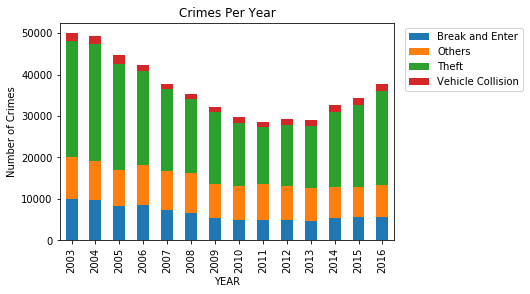

In [7]:
select = data.loc['2003-01-01':'2016-12-31',:]
crime_type_by_year = select.groupby(["CATEGORY", "YEAR"]).count()['MONTH']
crime_type_by_year_df = crime_type_by_year.unstack("CATEGORY")

crime_type_by_year_df.plot(kind='bar', stacked=True).legend(loc='upper right', bbox_to_anchor=(1.4,1))
plt.title("Crimes Per Year")
plt.ylabel("Number of Crimes")

- From the graph we can see that total crime has been gradually decreasing from 2003 to 2012/2013 and has been increasing slightly in more recent years
- The most common type of crime seems to be theft crimes and the least common crimes involve vehicle collisions
- It also seems that the trend of theft seems to be the crime type that affects the trend of total crime the most

Let's also look at the mean crime per day of the year from 2003 to 2017 to see if there are any days are that are especially high in crime. 

To do this we're going to use a Seaborn Heatmap where cells with darker blue signify days with higher than average crime and cells with light yellow/green signify days with lower than average crime.

Text(0.5, 1, 'Average Numeber of Crimes per Day from 2003-2017')

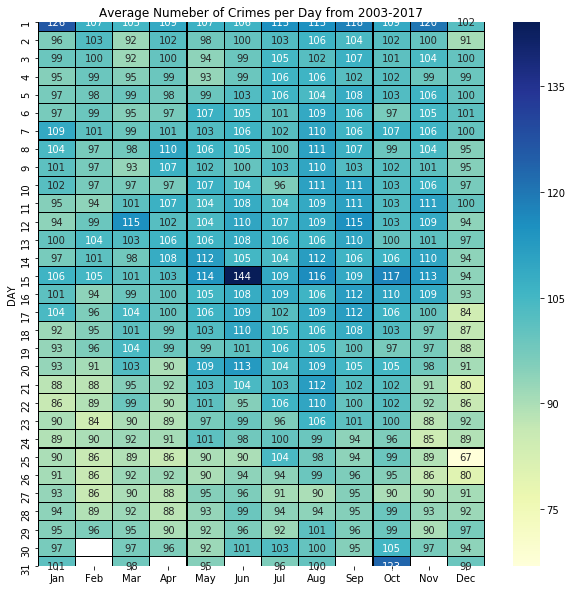

In [8]:
crimes_pivot_table = data.pivot_table(values='YEAR',index= 'DAY', columns='MONTH', aggfunc= len)

crimes_pivot_table_year_count = data.pivot_table(values='YEAR',index='DAY', columns='MONTH', aggfunc=lambda x: len(x.unique()))

crimes_average = round(crimes_pivot_table/crimes_pivot_table_year_count)
crimes_average.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


plt.figure(figsize = (10,10))
sns.heatmap(crimes_average, cmap= "YlGnBu", linecolor='black',linewidths=0.1,annot = True, fmt=".0f")
plt.title('Average Numeber of Crimes per Day from 2003-2017')

- It seems like criminals are less active in the later parts of each month -- maybe rent is due at the beginning? 
- Christmas is by far the day with the least arrests, either because no one is committing crimes, or because no one is out there to arrest them
- New Year's Day is the day with consistently the most arrests. This makes sense because celebrations with alcohol could lead to bad behaviour
- The days surrounding Halloween have higher crime rate due to alcohol related crime and the wide-use of illegal fireworks during this time
- June 15 is a big outlier due to the Stanley Cup Riots that happened on this day in 2011

## Types of Crime throughout the Years

In order to gain insights from the data as well as the outliers that know are present based off the Heatmap above, lets look at the types of crime throughout the year. 

From our stacked barplot of total crimes per year, we can see that the categories Theft, Break and Enter, and Other are the most significant. Let's look more in depth at these variables.

### Theft Crimes

In this category we have:
- Theft of Vehicle
- Theft of Bicycle
- Theft from Vehicle 
- Other Theft

Let's begin by plotting the total crimes per month for these categories over the years to observe overall trends and patterns for each type of theft.

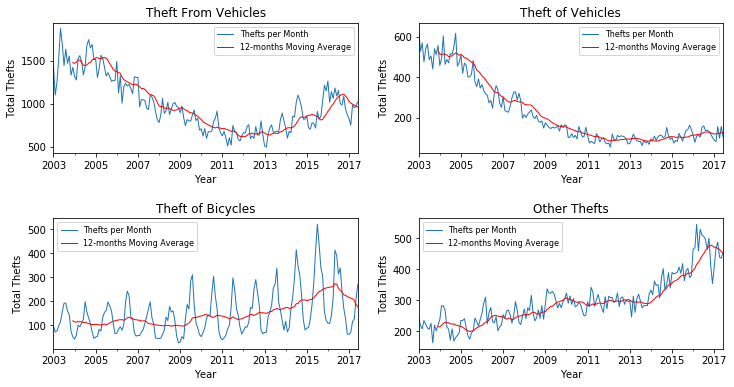

In [9]:
plt.subplot(2,2,1)
data[data['TYPE'] == 'Theft from Vehicle'].resample('M').count().TYPE.plot(figsize=(12,6), linewidth=1,label='Thefts per Month')
data[data['TYPE'] == 'Theft from Vehicle'].resample('M').size().rolling(window=12).mean().plot(color='red', linewidth=1, label='12-months Moving Average')
plt.title("Theft From Vehicles")
plt.ylabel("Total Thefts")
plt.xlabel("Year")
plt.tick_params(labelsize=10)
plt.legend(prop={'size':8})

plt.subplot(2,2,2)
data[data['TYPE'] == 'Theft of Vehicle'].resample('M').count().TYPE.plot(figsize=(12,6), linewidth=1,label='Thefts per Month')
data[data['TYPE'] == 'Theft of Vehicle'].resample('M').size().rolling(window=12).mean().plot(color='red', linewidth=1, label='12-months Moving Average')
plt.title("Theft of Vehicles")
plt.ylabel("Total Thefts")
plt.xlabel("Year")
plt.tick_params(labelsize=10)
plt.legend(prop={'size':8})

plt.subplot(2,2,3)
data[data['TYPE'] == 'Theft of Bicycle'].resample('M').count().TYPE.plot(figsize=(12,6), linewidth=1,label='Thefts per Month')
data[data['TYPE'] == 'Theft of Bicycle'].resample('M').size().rolling(window=12).mean().plot(color='red', linewidth=1, label='12-months Moving Average')
plt.title("Theft of Bicycles")
plt.ylabel("Total Thefts")
plt.xlabel("Year")
plt.tick_params(labelsize=10)
plt.legend(prop={'size':8})

plt.subplot(2,2,4)
data[data['TYPE'] == 'Other Theft'].resample('M').count().TYPE.plot(figsize=(12,6), linewidth=1,label='Thefts per Month')
data[data['TYPE'] == 'Other Theft'].resample('M').size().rolling(window=12).mean().plot(color='red', linewidth=1, label='12-months Moving Average')
plt.title("Other Thefts")
plt.ylabel("Total Thefts")
plt.xlabel("Year")
plt.tick_params(labelsize=10)
plt.legend(prop={'size':8})

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

- From these graphs we can see that there's been a very strong decline in Theft of Vehicles over the years.
    - From a little bit of research, we found that the Vancouver Police department implemented the Bait Car program specifically to target vehicle theft and the graph above shows that the program was very successful.
- Theft from Vehicles seems to be the most common type of theft and also ressembles the trend found in Total Crimes per Year barplot.
- Other Theft seems to increasing more rapidly in the most recent years.
- Theft of Bicycles has a very interesting trend as it seems to imply seasonality in the thefts.
    - Let's take a closer look at this specific type of theft.

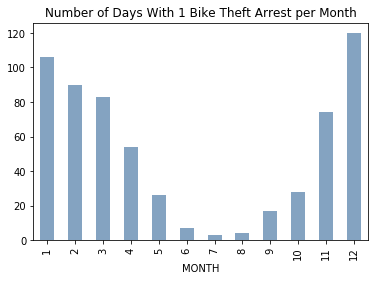

In [10]:
bt = data[data.TYPE == "Theft of Bicycle"]
bty = bt.groupby(["DAY", "MONTH", "YEAR"]).count() [bt.groupby(["DAY", "MONTH", "YEAR"]).count() <= 1 ]['TYPE']
bty.unstack("MONTH").count().plot(kind='bar',color=(0.2, 0.4, 0.6, 0.6))
plt.title("Number of Days With 1 Bike Theft Arrest per Month")
plt.tick_params(labelsize=10)

- From this graph we can see that bike thefts are definitely a seasonal crime being less common in the winter seasons and more common in the summer seasons. 

- This is probably due to the presence of snow and ice in the winter months, preventing people from using their bikes as well as a spike in bike use during the summer due to better conditions and increased tourism.

For the "Break and Enter" and "Other" categories of crime, we saw that these specific categories didn't change much over the years, so instead of looking at trends over time, lets look at specific outliers in these categories.

### Other Crimes

This category includes:
- Mischief
- Offense Against a Person
- Homicide

In [11]:
print(data[data['CATEGORY'] == 'Others']['TYPE'].value_counts())

Mischief                    70253
Offence Against a Person    54035
Homicide                      219
Name: TYPE, dtype: int64


Since data on Homicide is so limited, we should just focus on Michief and Offense crimes as they'll provide more meaningful results.

#### Mischief

Text(0.5, 0, 'Number of Mischief Arrests/Day')

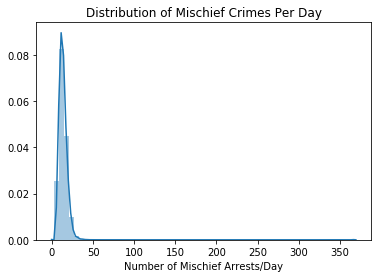

In [12]:
mischief_days = data[data['TYPE'] == 'Mischief'].resample('D').count().TYPE
sns.distplot(mischief_days, bins = 60)
plt.title("Distribution of Mischief Crimes Per Day")
plt.xlabel("Number of Mischief Arrests/Day")

- This data seems to be approximately normally distributed, with a mean of around 10-20 crimes per day.
- However there are definitely some outliers so let's look closer

In [13]:
print(mischief_days[(np.abs(stats.zscore(mischief_days) > 5))])

DATE
2008-03-12    120
2011-06-15    367
Name: TYPE, dtype: int64


- It looks like there are 2 days with a massive amount of Mischief crimes, one that we already know belongs to the Stanley Cup riots.
- Let's compare these days to the rest of their weeks to see if they were an explosion of unrest, or just anomalies

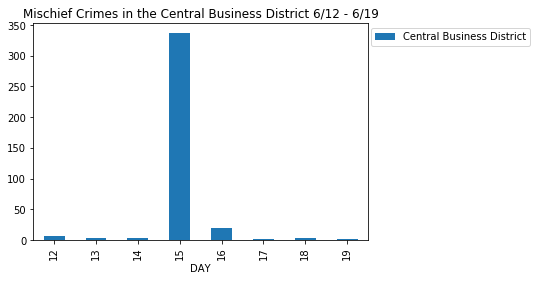

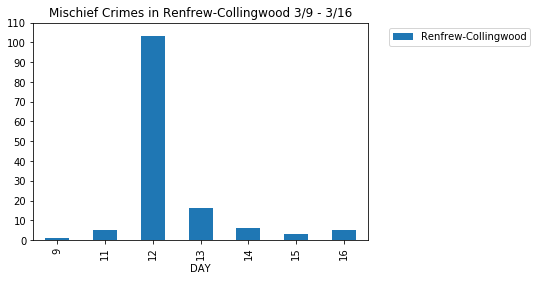

In [14]:
cbd = data[data['YEAR'] == 2011]
cbd1 = cbd[cbd['NEIGHBOURHOOD'] == 'Central Business District']
cbd2 = cbd1[cbd1['MONTH'] == 6]
cbd3 = cbd2[cbd2['DAY'].isin([12,13,14,15,16,17,18,19])]
cbd4 = cbd3[cbd3['TYPE'] == 'Mischief']
mischief_cbd_in_range = cbd4.groupby(['DAY', 'NEIGHBOURHOOD']).count()['TYPE']
mischief_cbd_in_range.unstack().plot(kind='bar')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))
plt.title("Mischief Crimes in the Central Business District 6/12 - 6/19");

rc = data[data['YEAR'] == 2008]
rc1 = rc[rc['NEIGHBOURHOOD'] == 'Renfrew-Collingwood']
rc2 = rc1[rc1['MONTH'] == 3]
rc3 = rc2[rc2['DAY'].isin([9,10,11,12,13,14,15,16])]
rc4 = rc3[rc3['TYPE'] == 'Mischief']
mischief_rc_in_range = rc4.groupby(['DAY', 'NEIGHBOURHOOD']).count()['TYPE']
mischief_rc_in_range.unstack().plot(kind='bar') 
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))
plt.title("Mischief Crimes in Renfrew-Collingwood 3/9 - 3/16");
plt.yticks(np.arange(0,120, step=10));

- It looks like the days where there were lots of Mischief crimes generally came out of nowhere but the elevated rates of Mischief tended to stick around for a day or 2 after, reflecting either heightened policing or tension still in the area.


- While the spike in Mischief crimes in the Central Business District can be easily explained by the Stanley Cup Riots, I couldn't find a single mention of the 100+ mischief arrests in Renfrew-Collingwood on March 12th, 2008. Since there was an elevated number of Mischief crimes the following day, I don't believe that the 100+ outlier was a reporting error by the Vancouver Police.


- Renfrew-Collingwood is a lower-income neighborhood, and this activity did occur in 2008 before the market crash, so maybe this event was triggered by a mass layoff, or something like that. This is pure speculation, but it's weird that so many people were arrested and there's nothing mention of it on the internet at all. Maybe Vancouver PD is hiding something!

#### Offence Against A Person

The term “crimes against the person” refers to a broad array of criminal offenses which usually involve bodily harm, the threat of bodily harm, or other actions committed against the will of an individual. ... Additionally, offenses such as harassment, kidnapping, and stalking also are considered crimes against the person.

Let's start by looking at the distribution of this specific crime again.

Text(0.5, 0, 'Number of Offence Arrests/Day')

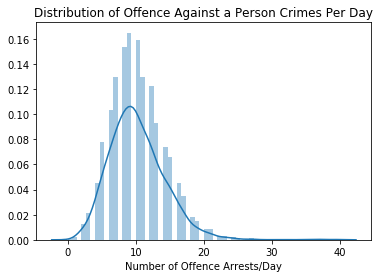

In [15]:
offence_days = data[data['TYPE'] == 'Offence Against a Person'].resample('D').count().TYPE
sns.distplot(offence_days, bins = 60)
plt.title("Distribution of Offence Against a Person Crimes Per Day")
plt.xlabel("Number of Offence Arrests/Day")

The distribution looks relatively normal with a slight right skew due to several days where it seems like people committed about quadruple the average number of Personal Offences, so let's see when they were and if we can make any conclusions off of them.

In [16]:
offence_days[np.abs(stats.zscore(offence_days) > 5)]

DATE
2004-01-01    40
2005-01-01    36
2006-01-01    39
2007-01-01    32
2008-01-01    39
2010-01-01    37
2011-01-01    37
2011-06-15    35
2012-01-01    31
2013-01-01    37
2014-01-01    34
Name: TYPE, dtype: int64

- Wow so all the significant outliers seem to be happening on New Years Day

Let's look more into this and look at the proportion of Offence crimes on New Years day compared to other days.

In [17]:
oaap1 = data[data['TYPE'] == 'Offence Against a Person']
oaap = oaap1[oaap1['DAY'] == 1]
oaap = oaap[oaap['MONTH'] == 1]
oaap_on_new_years = oaap.count()['TYPE']

print((1/365)*100)

oaap_ny_percentage = oaap_on_new_years/data[data['TYPE'] == 'Offence Against a Person'].count()['TYPE'] *100
print(oaap_ny_percentage)

0.273972602739726
0.8938650874433237


- So around 0.89% of all of Vancouver's Offences Against People occur on New Year's Day
- It's essentially almost 4 times more likely that you get arrested for Offence Against a Person on New Year's Day compared to the 0.27% chance on any other day of the year.

## Break and Enter Crimes

This category includes:
- Break and Enter Residential/Other
- Break and Enter Commercial

In [18]:
print(data[data['CATEGORY'] == 'Break and Enter']['TYPE'].value_counts())

Break and Enter Residential/Other    60768
Break and Enter Commercial           33787
Name: TYPE, dtype: int64


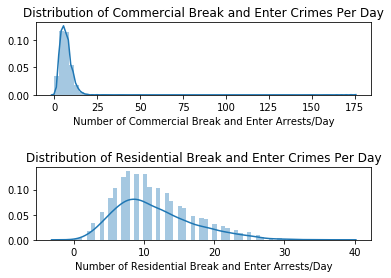

In [19]:
plt.subplot(2,1,1)
BE_commercial = data[data['TYPE'] == 'Break and Enter Commercial'].resample('D').count().TYPE
sns.distplot(BE_commercial, bins = 60)
plt.title("Distribution of Commercial Break and Enter Crimes Per Day")
plt.xlabel("Number of Commercial Break and Enter Arrests/Day")

plt.subplot(2,1,2)
BE_residential = data[data['TYPE'] == 'Break and Enter Residential/Other'].resample('D').count().TYPE
sns.distplot(BE_residential, bins = 60)
plt.title("Distribution of Residential Break and Enter Crimes Per Day")
plt.xlabel("Number of Residential Break and Enter Arrests/Day")

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.0)

- It seems that Commerical Breaking and Entering was also heavily affected by the Stanley Cup Riots, as many rioting fans broke into and destroyed businesses downtown. 
    - Were there any other significant outlier days where people broke into commercial buildings or is the tail caused only by the day of the riot?
    
    

- The Residential Breaking and Entering distribution seems mostly normal with a slight right skew and a couple outlier days where 30 homes and more were broken into. Let's see when and where this occurred.

### Breaking and Entering Commerical

In [20]:
bcd = data[data.TYPE == 'Break and Enter Commercial'].groupby("DATE").count()['TYPE']
print(bcd[np.abs(stats.zscore(bcd) > 4)])

DATE
2004-09-16     24
2006-02-03     24
2011-06-15    174
Name: TYPE, dtype: int64


In [21]:
print(data.loc['2011-06-15'][data.loc['2011-06-15'].TYPE == 'Break and Enter Commercial'].NEIGHBOURHOOD.value_counts())


Central Business District    171
Victoria-Fraserview            1
Fairview                       1
Dunbar-Southlands              1
Name: NEIGHBOURHOOD, dtype: int64


- While there were two days with 24 Breaking and Entering (Commercial) crimes, neither are particularly close to the 174 people arrested for breaking and entering during the 2011 Stanley Cup Riots so I will be focusing on those. 


- Also, the majority of these Breaking and Entering arrests were made in the Central Business District as a direct result of the riots, so I will be focusing on that neighborhood.

Text(0.5, 1.0, 'B&E Commercial Crimes Per Day in Central Business District with Outliers Removed')

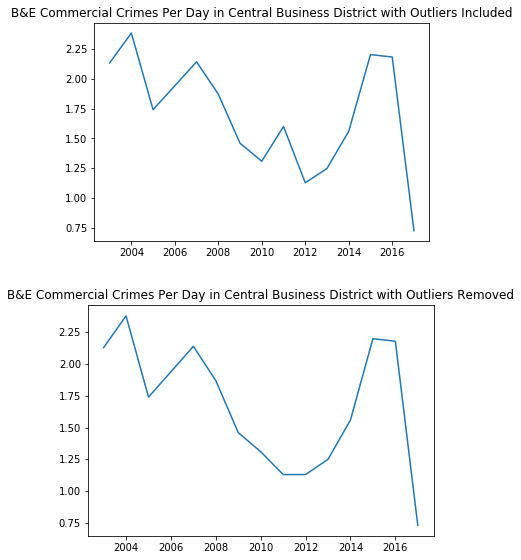

In [22]:
fig = plt.figure()

bec = data[data.TYPE == "Break and Enter Commercial"].groupby(['NEIGHBOURHOOD', 'YEAR', 'MONTH', 'DAY'])['TYPE']
break_comm_df = bec.count().unstack('NEIGHBOURHOOD').fillna(0)
bec_cbd_sum = break_comm_df.stack().unstack("YEAR").unstack("NEIGHBOURHOOD").sum()

ax1=fig.add_subplot(111)
ax1.plot(bec_cbd_sum.unstack("NEIGHBOURHOOD")['Central Business District'].div(365.25).round(2))
plt.title("B&E Commercial Crimes Per Day in Central Business District with Outliers Included")


bec_cbd_no_outliers =  break_comm_df[(np.abs(stats.zscore(break_comm_df['Central Business District'])) < 5)]
bec_cbd_no_outliers_sum = bec_cbd_no_outliers.stack().unstack("YEAR").unstack("NEIGHBOURHOOD").sum()

ax2 = fig.add_axes([0.11, -.9, .8, .8])
ax2.plot(bec_cbd_no_outliers_sum.unstack("NEIGHBOURHOOD")['Central Business District'].div(365.25).round(2))
plt.title("B&E Commercial Crimes Per Day in Central Business District with Outliers Removed")

- We can see that with the exclusion of the Stanley Cup Riots allows us to see that the trend is more of what we expected form the trends of total crime.


- We can also see that there is a significant reduction in break-ins from 2007-2012

### Break and Enter Residential

In [23]:
ber = data[data.TYPE == 'Break and Enter Residential/Other'].groupby("DATE").count()['TYPE']
print(ber[np.abs(stats.zscore(ber) > 4)])

DATE
2003-04-03    34
2003-04-26    34
2004-03-08    37
Name: TYPE, dtype: int64


- It seems like most of these crimes occurred in the Spring months of the early/mid 2000s, where Vancouver had more crime than it does now.

Let's check which neighborhoods the thieves hit most often:

In [24]:
print(data.loc["2003-04-03"][data.loc["2003-04-03"].TYPE == 'Break and Enter Residential/Other'].NEIGHBOURHOOD.value_counts().head(5))


Oakridge                     6
Sunset                       3
Dunbar-Southlands            3
Central Business District    3
Marpole                      3
Name: NEIGHBOURHOOD, dtype: int64


In [25]:
print(data.loc["2003-04-26"][data.loc["2003-04-26"].TYPE == 'Break and Enter Residential/Other'].NEIGHBOURHOOD.value_counts().head(5))


Hastings-Sunrise       9
Kitsilano              5
Sunset                 5
Renfrew-Collingwood    3
Fairview               2
Name: NEIGHBOURHOOD, dtype: int64


In [26]:
print(data.loc["2004-03-08"][data.loc["2004-03-08"].TYPE == 'Break and Enter Residential/Other'].NEIGHBOURHOOD.value_counts().head(5))


Grandview-Woodland    4
Mount Pleasant        4
Fairview              4
Sunset                4
Riley Park            3
Name: NEIGHBOURHOOD, dtype: int64


- Interestingly enough, there doesn't seem to be a specific neighborhood targeted for mulitple major attacks

## Analyzing Crime by Neighbourhoods

In this portion we're going to look at the trends between specific neighbourhoods and crime rates. I'll also be incorporating data about neighbourhood population and area from the Vancouver public census website. See here https://vancouver.ca/news-calendar/areas-of-the-city.aspx for specifics.

### Geographic View


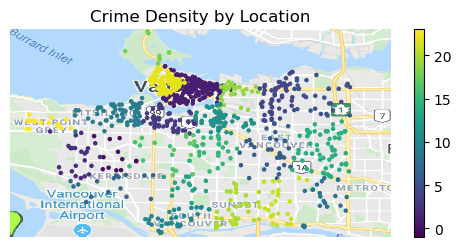

In [63]:
data = pd.read_csv('/Users/danielluo/Downloads/crime-in-vancouver/crime.csv')
data['counter'] = 1

cleaned = data[data.Longitude != 0]
cleaned = cleaned[cleaned.Longitude > -123.797726]
cleaned = cleaned[cleaned.Latitude > 49.118175]

cleaned.TYPE = cleaned.TYPE.astype('category').cat.codes
cleaned.NEIGHBOURHOOD = cleaned.NEIGHBOURHOOD.astype('category').cat.codes

from matplotlib.pyplot import figure
figure(num=None, figsize=(6.13,2.75), dpi=100, facecolor='w', edgecolor='k')
img = plt.imread('/Users/danielluo/data/vancouverpic2.png', 0)
# crop to 723
img_cropped = img[:,:726,:]
plt.imshow(img_cropped, zorder=0, aspect = 'auto',extent=[-123.223955, -123, 49.20089685,49.31334872])
sample = cleaned.sample(1000)

plt.scatter(sample['Longitude'],sample['Latitude'], c = sample['NEIGHBOURHOOD'], s = 5)
plt.colorbar()
plt.title("Crime Density by Location")
plt.axis('off')
plt.show()

From this sample of 2000 crimes, we can get a sense of the where the crime density lies in Vancouver. The highly dense yellow and dark purple areas represent the West End and the Central Business District. These are the most urban and densely populated areas in Vancouver so it makes sense that these are locations of high crime density.

### Neighbourhoods by Crime Proportion

In [84]:
neighborhood_crime_percent = round(neighborhood_crime.iloc[:,:9].div(neighborhood_crime['All Crime Count'], axis = 0) * 100, 2)
neighborhood_crime_percent['All Crime Count'] = neighborhood_crime['All Crime Count']
neighborhood_crime_percent.sort_values('All Crime Count')[::-1]

TYPE,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),All Crime Count
NEIGHBOURHOOD,,,,,,,,,,
Central Business District,8.45,3.16,15.03,17.35,43.27,6.23,3.62,0.04,2.87,110947
West End,6.71,8.42,12.88,14.59,40.88,7.22,6.43,0.01,2.86,41352
Fairview,10.27,11.92,9.94,10.16,37.11,10.55,6.33,0.04,3.67,32161
Mount Pleasant,9.07,10.73,13.33,12.11,31.70,8.99,8.69,0.06,5.32,30536
Grandview-Woodland,7.66,16.61,18.29,9.23,27.01,5.16,11.45,0.03,4.56,27180
Renfrew-Collingwood,4.47,16.05,14.52,15.39,31.46,1.57,11.25,0.04,5.24,26761
Kitsilano,7.84,16.44,13.83,6.48,33.38,9.23,8.86,0.05,3.90,26699
Kensington-Cedar Cottage,5.12,16.58,15.08,11.87,29.97,3.44,11.70,0.04,6.19,24941
Strathcona,10.36,9.65,21.78,4.75,35.10,4.85,7.89,0.10,5.52,20919


We can see that the most common type of crime in the Central Business District and West End is Theft from a Vehicle, meaning most of the crimes that occur in these urban areas are thefts from cars.

We can see that Shaughnessy, Arbutus Ridge, Oakridge, Kerrisdale have a high number of residential break-ins. This indicates to me that either they're probably highly residential (and so the only crime that exists is residential break ins).



## Neighbourhoods by Time

Text(0.5, 1.0, 'Mount Pleasant')

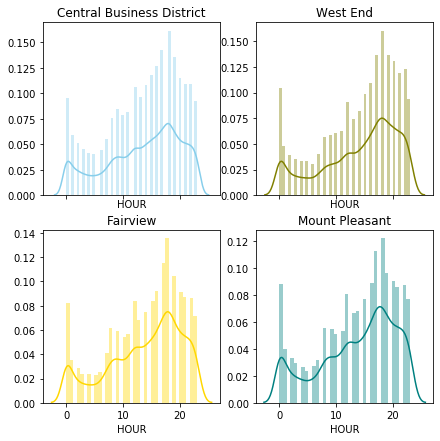

In [83]:
df = data[['HOUR', 'NEIGHBOURHOOD']]
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( df[df.NEIGHBOURHOOD == "Central Business District"].HOUR , color="skyblue", ax=axes[0, 0]).set_title('Central Business District')
sns.distplot( df[df.NEIGHBOURHOOD == "West End"].HOUR , color="olive", ax=axes[0, 1]).set_title('West End')
sns.distplot( df[df.NEIGHBOURHOOD == "Fairview"].HOUR , color="gold", ax=axes[1, 0]).set_title('Fairview')
sns.distplot( df[df.NEIGHBOURHOOD == "Mount Pleasant"].HOUR , color="teal", ax=axes[1, 1]).set_title('Mount Pleasant')

We can see that crime goes spikes at around 6-7pm. This is expected since this data measures when the crimes are reported and it makes sense (especially in the Central Business District) since most of the crimes are theft vehicles which are likely reported after work.

#### Preprocessing Data for future graphs

Since there are a ton of different neighbourhoods in Vancouver, we'll be focusing on four of them specifically. Based on their socio-economic uniqueness.

Strathcona - Represents a fairly low income residential neighbourhood. We expect high crime in this area.
Central Business District - Represents urban downtown Vancouver.
West Point Grey - Rich?
Mount Pleasant - Middle class?

In [70]:
# pre-processing and loading necessary data.
data['counter'] = 1
categories=['Theft', 'Break and Enter', 'Vehicle Collision', 'Others']    
neighbourhoods_alpha = pd.Series(pd.unique(data.NEIGHBOURHOOD)).sort_values().reset_index().iloc[:,1]

# categories
def categorize(crime):
    if 'Theft' in crime:
        return "Theft"
    elif 'Break' in crime:
        return 'Break and Enter'
    elif 'Collision' in crime:
        return 'Vehicle Collision'
    else:
        return 'Others'

categories=['Theft', 'Break and Enter', 'Vehicle Collision', 'Others']    

data['CATEGORY'] = data['TYPE'].apply(categorize)

# values taken from website
neighbourhood_areas = pd.Series([370,370,856,327,445,793,724,631,664,546,559,366,125,401,805,491,446,217,405,388,626,531,198,445,0])
neighbourhood_pops2016 = pd.Series([15295, 62030, 21425, 33620, 29175, 34575, 49325, 13975, 29325, 43045, 24460, 32955, 2300, 13030, 51530, 22555, 8430, 7970, 0, 12585, 36500, 31065, 47200, 13065, 0])

# create dataframes of neighbourhood w population and area
area_neighbourhood = pd.concat([neighbourhoods_alpha, neighbourhood_areas], axis=1, keys = ['NEIGHBOURHOOD', 'AREA']).set_index('NEIGHBOURHOOD')
area_neighbourhood
pop_neighbourhood = pd.concat([neighbourhoods_alpha, neighbourhood_pops2016], axis=1, keys = ['NEIGHBOURHOOD','POPULATION']).set_index('NEIGHBOURHOOD')
pop_neighbourhood

# create a list of crimes with known data
crimes = pd.unique(data.TYPE)
known_crimes = crimes[crimes != 'Homicide']
known_crimes = known_crimes[known_crimes != 'Offence Against a Person']

# neighbourhoods of interest
neighbourhoods_interest = ['Strathcona', 'Central Business District', 'West Point Grey', 'Mount Pleasant']
neighbourhoods_interestedin = data[data.NEIGHBOURHOOD.isin(neighbourhoods_interest)]

# functions to plot
def plot_density(data, crime_type, time_interval, neighbourhoods):
    subset = data[data.CATEGORY == crime_type]
    time_density_neighbourhood = pd.pivot_table(subset, values = 'counter', index = 'NEIGHBOURHOOD', columns = time_interval, aggfunc = 'sum').divide(area_neighbourhood.AREA, axis=0).T[neighbourhoods]
    ax = time_density_neighbourhood.plot(title="Crime Density through the Years: " + str(crime_type))
    ax.set_ylabel("Crime Occurrences per Hectare")
    ax.get_legend().set_bbox_to_anchor((1, 1))
    
def plot_per_cap(data, crime_type, time_interval, neighbourhoods):
    subset = data[data.CATEGORY == crime_type]
    time_density_neighbourhood = pd.pivot_table(subset, values = 'counter', index = 'NEIGHBOURHOOD', columns = time_interval, aggfunc = 'sum').divide(pop_neighbourhood.POPULATION, axis=0).T[neighbourhoods]
    ax = time_density_neighbourhood.plot(title="Crime Density through the Years: " + str(crime_type))
    ax.set_ylabel("Crime Occurrences per Capita")
    ax.get_legend().set_bbox_to_anchor((1, 1))

### Crime per Capita per Year

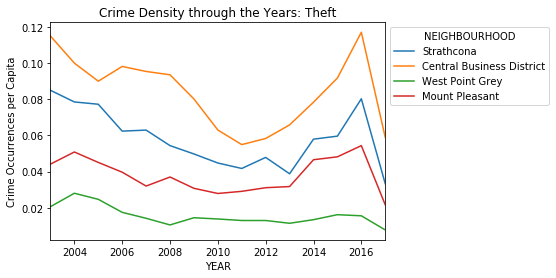

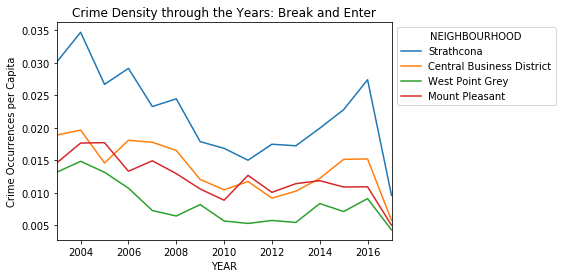

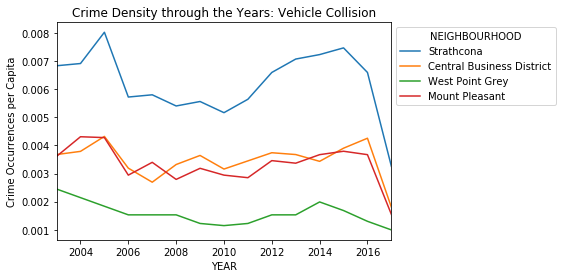

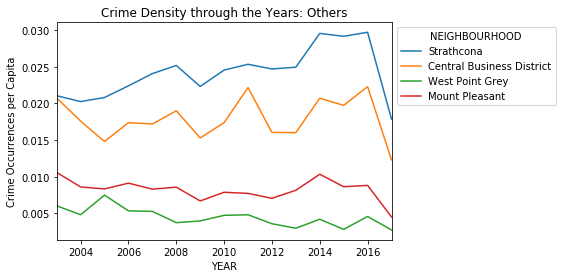

In [71]:
# do in subplots so its a grid of 4

for crime in categories:
    plot_per_cap(neighbourhoods_interestedin, crime, 'YEAR', neighbourhoods_interest)

We can see that although theft is highest in the Central Business District, crimes such as breaking and entering as well as vehicle collisions are the highest in Strathcona, which confirms the hypothesis that it is a low income, generally dangerous neighbourhood.

Mt Pleasant and West Point Grey remain as fairly safe neighbourhoods.